<a href="https://colab.research.google.com/github/CaseyMayo/Numerical_Methods/blob/master/MayoCasey_HaysMadison_OyesanyaOluwayemisi_CPSMA_4413_01_Module1_GroupCodingAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Let's Talk About Errors

Participants: Casey Mayo, Madison Hays, Oluwayemisi Oyesanya

Professor: Dr Jacob

Class: Numerical Methods 

Group Project 1 

Module: Errors

Errors can be checked using a multitude of different ways. Below, tools are built utilizing python to quickly compute the total true error, relative error, approximate error, and approximate relative error.

In [ ]:
def trueError (trueValue, approxValue):
   return trueValue - approxValue

In [ ]:
def relativeError (trueValue, trueError):
  return trueError / trueValue 

In [ ]:
def approxError (presentApprox, previousApprox): 
  return presentApprox - previousApprox

In [ ]:
def approxRelativeError (presentApprox, previousApprox): #to quantify error for cases where trueValue isn't known
  return approxError (previousApprox, presentApprox) / presentApprox

  #   Can specify a minimum acceptable tolerance (i.e. pre-specified tolerance). 
  #   If approxRelativeError is less than or equal to the pre-specified tolerance, 
  #   then the acceptable error has been reached and no more iterations are required. 

In order to estimate a non-polynomial function like ***$4e^{-x}$  centered at 3***, the Taylor Series is used and expanded to the 20th degree. 

The necessity of expanding to the 20th degree lies within the application of the Taylor Series. The larger the expansion, the more information is concluded to approximate the function in question. The draw back is that this expansion also causes the equation to become more complicated. 

In [ ]:
import math

def Taylor_Coefficient(degree, input):
  return 4*(-1)**(degree)*(math.exp((-1)*input))/(math.factorial(degree))

def Taylor_Term(degree, input):
  return Taylor_Coefficient(degree, input)*((input - 3)**(degree))

def Taylor_Polynomial(degree, input):
  sum = 0

  for i in range(0, degree + 1):
    sum = sum + Taylor_Term(i, input)
  return sum

A table is created to show values of the previous function with a center of $3 + 0.1$. 

The degree of expansion is shown with the degree of expansion's respective true value, approximate value, true error, relative error, approximate error and relative approximate error. 

In [ ]:
degree = [i for i in range(0, 21)]
True_Values = [4*(math.exp((-1)*(3+.1))) for i in degree]
Approx_Values = [Taylor_Polynomial(n, 3.1) for n in degree]
True_Errors = [trueError(True_Values[i], Approx_Values[i]) for i in degree]
Relative_Errors = [relativeError(True_Values[i], True_Errors[i]) for i in degree]
Approx_Errors = [approxError(Approx_Values[i], Approx_Values[i+1]) for i in range(0,19)]
Relative_Approx_Errors = [approxRelativeError(Approx_Values[i], Approx_Values[i+1]) for i in range(0,19)]

In [ ]:
import plotly.graph_objects as go

Taylor_Table = go.Figure(data=[go.Table(
                header=dict(values=['Degree', 'True Value', 'Approximated Value','True Error','Relative Error','Approximate Error','Relative Approximate Error']),
                 cells=dict(values = [degree, True_Values, Approx_Values, True_Errors, Relative_Errors, Approx_Errors, Relative_Approx_Errors]))
                     ])
Taylor_Table.show()

As indictated by the table, in the 9th degree, the error has surpassed the floating point error. By continuing to show further degrees of expansion, the need for a 20th degree expansion is negated. A more appropriate place to cut off the computation would have been the 10th degree. 


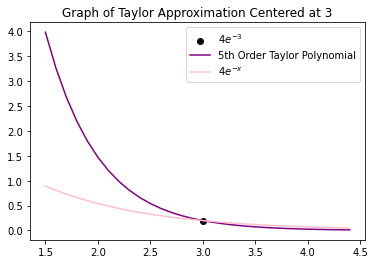

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vector = np.vectorize(Taylor_Polynomial)
x = np.arange(1.5, 4.5, .1)

plt.scatter(3, 4*math.exp(-3), c="black")
plt.plot(x, vector(5, x), c="purple")
plt.plot(x, 4*np.exp((-1)*x), c="pink")
plt.title('Graph of Taylor Approximation Centered at 3')
 
plt.legend(['$4e^{-3}$', '5th Order Taylor Polynomial', r'$4e^{-x}$'])

plt.show()

Pictured: The function $4e^{-x}$ center $= 3$ computed with the Taylor Series to the $5^{th}$ degree.

Adjusting the viewing window allows the function center to be included, while also being able to discern the approximation from the actual value in the Taylor Series. 

The approximation starts to be dismissed for $x$ values less than 3 due to the error that starts to increase. As the graph shows, after $x$ becomes less than 3, the approximation starts getting further away from the actual function. 

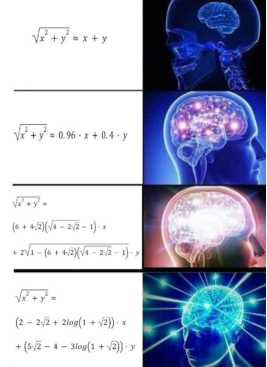

For clarity, the original will be: $$x+y=0,$$ and the second approximation: $$0.96*x + 0.4*y=0.$$


Below is table created that generates and compares 10 values for the original and approximation function. 

In [ ]:
def original(x, y):
  original = math.sqrt(x**2 + y**2)
  return original

def approximation(x,y):
  approx = 0.96*x + 0.4*y
  return approx

order = [i for i in range(10)]
x = [i for i in order]
y = [i for i in order]

original = [original(x[i] , y[i]) for i in order]
approximation = [approximation(x[i], y[i]) for i in order]

In [ ]:
meme_approx_table = go.Figure(data=[go.Table(
                header=dict(values=['x value', 'y value', 'Original', 'Approximation']),
                cells=dict(values = [x, y, original, approximation]))])
meme_approx_table.show()




The approximations calculated do tend to resemble the original answer to a close degree. 

The use of an approximation, like the above, could be beneficial in use to simplify complicated expressions. This would both be easier and faster to manually calculate if no calculator was available for true answers. 

The meme is silly. While the level of "braininess" does seem to go with the complicated formula it is paired with, the super-smart meme man (or woman) is using a ridiulcouly complicated expression to find the $approximation$ of the answer. 